In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
learning_rate = 0.001
batch_size = 30 #100 reduce batch_size
training_epochs = 15
nb_classes = 10

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
# change data shape
print(x_train.shape)  # (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

(60000, 28, 28)


In [7]:
# change result to one-hot encoding
# in tf1, one_hot= True in read_data_sets("MNIST_data/", one_hot=True)
# took care of it, but here we need to manually convert them
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
# # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows
#  stays the same. to_categorical(labels)
# array([[ 1.,  0.,  0.],
#        [ 0.,  0.,  1.],
#        [ 0.,  1.,  0.],
#        [ 0.,  0.,  1.],
#        [ 1.,  0.,  0.]], dtype=float32)

In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.001), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/15
2000/2000 [==============================] - 2s 983us/step - loss: 0.4600 - accuracy: 0.8795
Epoch 2/15
2000/2000 [==============================] - 2s 940us/step - loss: 0.3018 - accuracy: 0.9158
Epoch 3/15
2000/2000 [==============================] - 2s 953us/step - loss: 0.2821 - accuracy: 0.9207
Epoch 4/15
2000/2000 [==============================] - 2s 965us/step - loss: 0.2720 - accuracy: 0.9239
Epoch 5/15
2000/2000 [==============================] - 2s 953us/step - loss: 0.2661 - accuracy: 0.9256
Epoch 6/15
2000/2000 [==============================] - 2s 954us/step - loss: 0.2617 - accuracy: 0.9269
Epoch 7/15
2000/2000 [==============================] - 2s 951us/step - loss: 0.2579 - accuracy: 0.9283
Epoch 8/15
2000/2000 [==============================] - 2s 952us/step - loss: 0.2548 - accuracy: 0.9293
Epoch 9/15
2000/2000 [==============================] - 2s 948us/step - loss: 0.2526 - accuracy: 0.9301
Epoch 10/15
2000/2000 [==============================] - 2s 964u

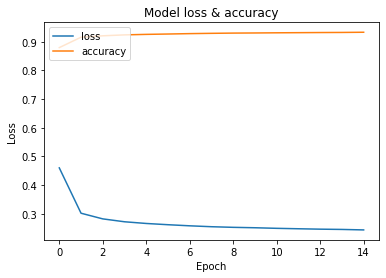

[0.9311166405677795, 0.9315666556358337, 0.932033360004425, 0.9323833584785461, 0.9330666661262512]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [15]:
predictions = model.predict(x_test)
print('Prediction: \n', predictions)

Prediction: 
 [[1.75038181e-07 2.81947534e-13 1.15511659e-06 ... 9.93559837e-01
  1.50489250e-05 4.67264908e-04]
 [1.98478956e-05 5.22079290e-07 9.96774256e-01 ... 1.44406106e-21
  6.86027670e-06 2.35189947e-18]
 [3.72345681e-07 9.84185517e-01 1.06521165e-02 ... 2.59684748e-05
  2.34030327e-03 1.65628371e-04]
 ...
 [5.49216939e-09 1.31330480e-09 9.49113382e-06 ... 8.64499947e-04
  2.82252971e-02 3.92593443e-02]
 [1.16862333e-08 1.91426519e-08 3.34778036e-08 ... 2.04322781e-08
  1.04139755e-02 1.97298977e-08]
 [2.06512460e-08 4.99700258e-16 7.30487955e-05 ... 1.02901227e-17
  3.88718790e-09 1.67167658e-13]]


In [16]:
score = model.evaluate(x_train, y_train)
print('Accuracy: ', score[1])

1875/1875 [==============================] - 1s 705us/step - loss: 0.2427 - accuracy: 0.9330
Accuracy:  0.9329666495323181
